In [3]:
import pandas as pd

df = pd.read_csv('../data/benin-malanville.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [4]:
df.describe()
df.isna().sum() / len(df)  # List columns with >5% nulls

Timestamp        0.0
GHI              0.0
DNI              0.0
DHI              0.0
ModA             0.0
ModB             0.0
Tamb             0.0
RH               0.0
WS               0.0
WSgust           0.0
WSstdev          0.0
WD               0.0
WDstdev          0.0
BP               0.0
Cleaning         0.0
Precipitation    0.0
TModA            0.0
TModB            0.0
Comments         1.0
dtype: float64

In [5]:
from scipy.stats import zscore

# Define columns of interest
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[cols].apply(zscore)
outliers = (abs(z_scores) > 3).any(axis=1)

# Clean outliers
df_clean = df[~outliers].copy()

# Fill missing values with median (avoid SettingWithCopyWarning)
df_clean[cols] = df_clean[cols].fillna(df_clean[cols].median(numeric_only=True))

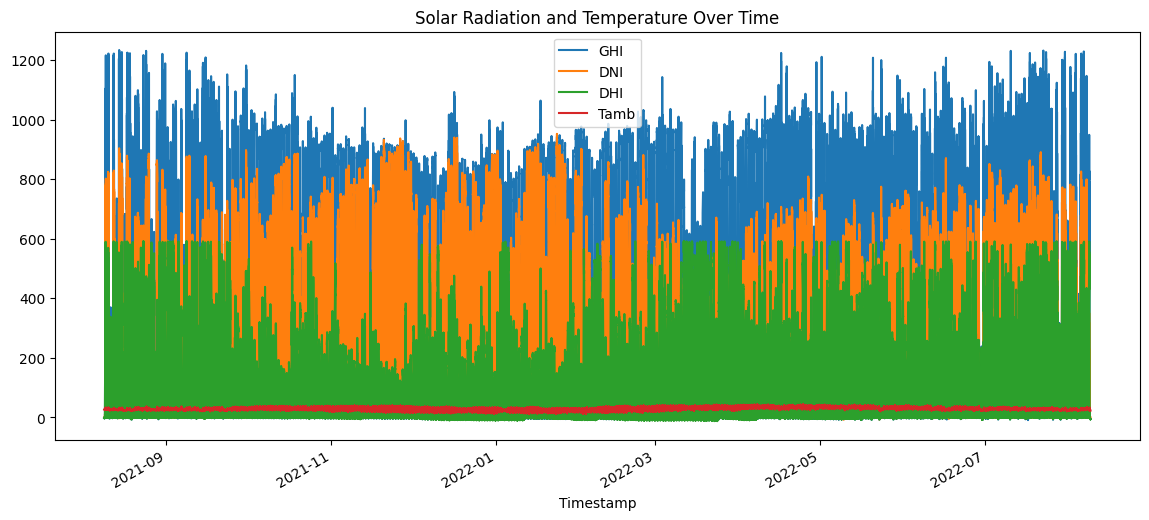

In [7]:
import matplotlib.pyplot as plt

df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(14, 6), title="Solar Radiation and Temperature Over Time")
plt.show()

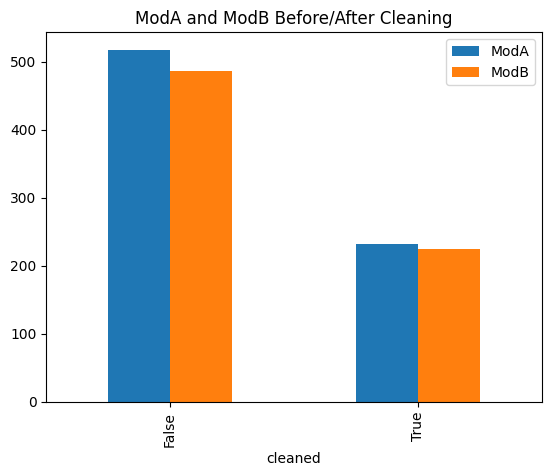

In [8]:
# Create 'cleaned' column
df['cleaned'] = ~outliers
df.groupby('cleaned')[['ModA', 'ModB']].mean().plot(kind='bar', title='ModA and ModB Before/After Cleaning')
plt.show()

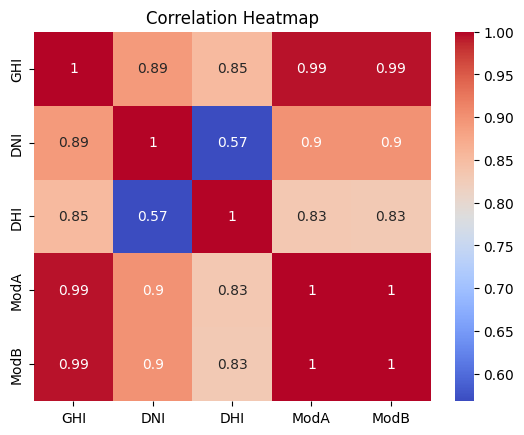

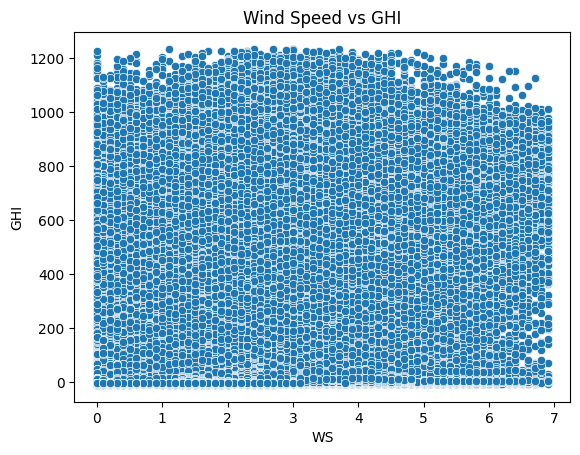

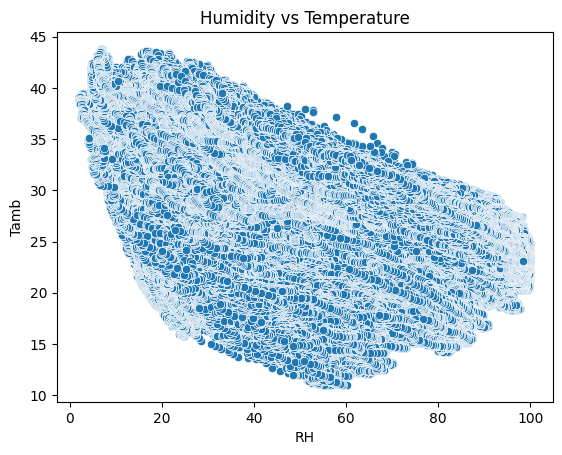

In [9]:
import seaborn as sns

# Correlation heatmap
sns.heatmap(df_clean[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots
sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title('Wind Speed vs GHI')
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title('Humidity vs Temperature')
plt.show()

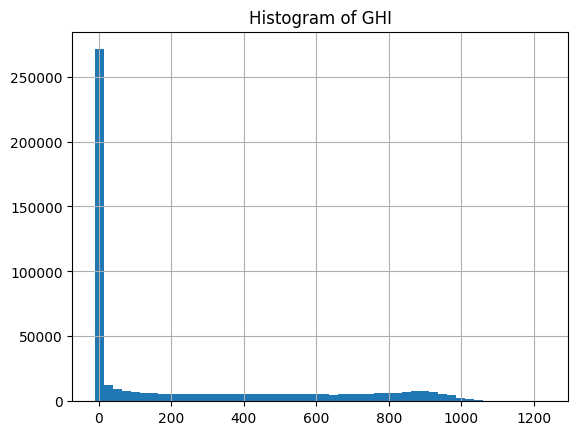

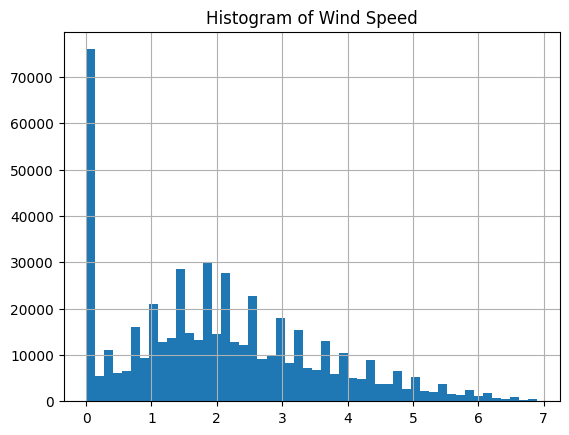

In [10]:
# Histogram
df_clean['GHI'].hist(bins=50)
plt.title('Histogram of GHI')
plt.show()

df_clean['WS'].hist(bins=50)
plt.title('Histogram of Wind Speed')
plt.show()

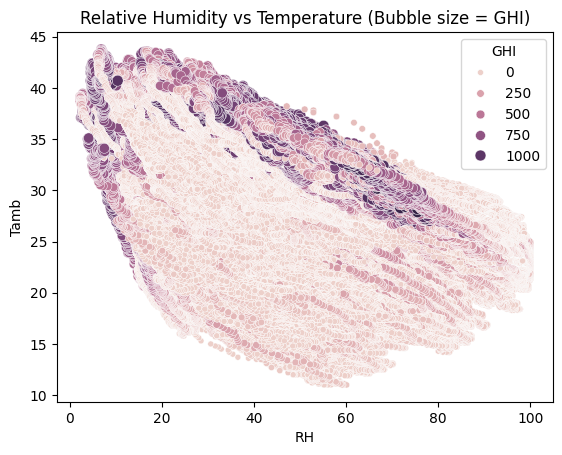

In [11]:
sns.scatterplot(x='RH', y='Tamb', hue='GHI', size='GHI', data=df_clean)
plt.title('Relative Humidity vs Temperature (Bubble size = GHI)')
plt.show()

In [12]:
df_clean.to_csv('../data/togo_clean.csv', index=False)